In [20]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
# from tqdm import tqdm
import PIL.Image
from sklearn.model_selection import train_test_split
from keras.utils import Sequence
from sklearn.utils import shuffle
from pathlib import Path

In [14]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
os.environ["TF_GPU_ALLOCATOR"] = 'cuda_malloc_async'
gpus = tf.config.list_physical_devices('GPU')

Num GPUs Available:  1


In [15]:
def load_xy(px, py):
    """ Converts filenames in X to an array of pixels representing image from
    filesnames in X """
    nx = np.array(px, dtype=str)
    # print(nx[0])
    new_x = []
    for path in nx:
        with PIL.Image.open(f"Training/Depth/{path}") as img:
            # print(img_fpath)
            # display(img)
            img_data = np.asarray(img, np.float32)

            # Reshape
            img_data = np.reshape(img_data, (240, 320, 1))

            img_data = tf.image.per_image_standardization(img_data)

            new_x.append(img_data)

    ny = np.array(py)
    # print(ny)
    # print(np.array(new_x).size)
    return np.array(new_x), ny

In [16]:
print("Reading labels.txt")
with open("Training/labels.txt", "r") as label:
    labels = [line.strip().split() for line in label]
print("Finish Reading labels.txt")
RAND_SEED = 42
IMG_WIDTH = 320
IMG_HEIGHT = 240
IMG_DIM = (IMG_HEIGHT, IMG_WIDTH)
shuffle(labels)
img_paths = []
targets = []
print("Processing labels...")
for label in labels:
    img_path, target = label[0], label[1:]
    base_folder = img_path.split('/')[0]
    img_paths.append(img_path)
    targets.append([float(t) for t in target])
print("Finished processing labels")
print(len(img_paths), len(targets))

# LIMIT THE DATA FOR TEST PURPOSES
# m = 100
X = img_paths
Y = targets
# COMMENT THIS SECTION TO TRAIN ALL DATA

print("Splitting the data...")
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=RAND_SEED
)
# 30% total - 75% of it used for val, 25% of the rest used for train
X_val, X_test, Y_val, Y_test = train_test_split(
    X_test,
    Y_test,
    test_size=0.25,
    random_state=RAND_SEED
)
print("Finished Splitting data")

Reading labels.txt
Finish Reading labels.txt
Processing labels...
Finished processing labels
331005 331005
Splitting the data...
Finished Splitting data


Creating our model...
Finished compiling our model
Initializing Training process...
Continue Training with pre-trained weights
Epoch 1/100
1811/1811 [==============================] - ETA: 0s - loss: 25.0869 - mae: 25.0869
Epoch 1: val_loss improved from inf to 16.47180, saving model to Model/resnet_bs128_lr0.001.h5
1811/1811 [==============================] - 1643s 893ms/step - loss: 25.0869 - mae: 25.0869 - val_loss: 16.4718 - val_mae: 16.4718
Epoch 2/100
1749/1811 [===========================>..] - ETA: 45s - loss: 24.8228 - mae: 24.8228

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1811/1811 [==============================] - ETA: 0s - loss: 23.7406 - mae: 23.7406
Epoch 8: val_loss did not improve from 11.88439
1811/1811 [==============================] - 1615s 892ms/step - loss: 23.7406 - mae: 23.7406 - val_loss: 15.8030 - val_mae: 15.8030
Epoch 9/100
1811/1811 [==============================] - ETA: 0s - loss: 23.5790 - mae: 23.5790
Epoch 9: val_loss improved from 11.88439 to 11.13555, saving model to Model/resnet_bs128_lr0.001.h5
1811/1811 [==============================] - 1618s 894ms/step - loss: 23.5790 - mae: 23.5790 - val_loss: 11.1355 - val_mae: 11.1355
Epoch 10/100
1811/1811 [==============================] - ETA: 0s - loss: 23.4896 - mae: 23.4896
Epoch 10: val_loss improved from 11.13555 to 10.41757, saving model to Model/resnet_bs128_lr0.001.h5
1811/1811 [==============================] - 1616s 892ms/step - loss: 23.4896 - mae: 23.4896 - val_loss: 10.4176 - val_mae: 10.4176
Epoch 11/100
1811/1811 [==============================] - ETA: 0s - loss: 23.6

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1811/1811 [==============================] - ETA: 0s - loss: 22.5378 - mae: 22.5378
Epoch 19: val_loss did not improve from 10.13359
1811/1811 [==============================] - 1617s 893ms/step - loss: 22.5378 - mae: 22.5378 - val_loss: 13.0456 - val_mae: 13.0456
Epoch 20/100
1811/1811 [==============================] - ETA: 0s - loss: 22.4105 - mae: 22.4105
Epoch 20: val_loss did not improve from 10.13359
1811/1811 [==============================] - 1618s 893ms/step - loss: 22.4105 - mae: 22.4105 - val_loss: 11.8715 - val_mae: 11.8715
Epoch 21/100
1811/1811 [==============================] - ETA: 0s - loss: 22.3022 - mae: 22.3022
Epoch 21: val_loss did not improve from 10.13359
1811/1811 [==============================] - 1611s 889ms/step - loss: 22.3022 - mae: 22.3022 - val_loss: 10.6133 - val_mae: 10.6133
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Creating our model...
Finished compiling our model
Initializing Training process...
Start Training with Batch Size of 64
Epoch 1/

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



3621/3621 [==============================] - ETA: 0s - loss: 23.3709 - mae: 23.3709
Epoch 7: val_loss improved from 12.88116 to 11.22242, saving model to Model/resnet_bs64_lr0.001.h5
3621/3621 [==============================] - 1645s 454ms/step - loss: 23.3709 - mae: 23.3709 - val_loss: 11.2224 - val_mae: 11.2224
Epoch 8/100
3621/3621 [==============================] - ETA: 0s - loss: 23.1105 - mae: 23.1105
Epoch 8: val_loss did not improve from 11.22242
3621/3621 [==============================] - 1661s 459ms/step - loss: 23.1105 - mae: 23.1105 - val_loss: 12.5553 - val_mae: 12.5553
Epoch 9/100
3621/3621 [==============================] - ETA: 0s - loss: 22.8257 - mae: 22.8257
Epoch 9: val_loss did not improve from 11.22242
3621/3621 [==============================] - 1635s 452ms/step - loss: 22.8257 - mae: 22.8257 - val_loss: 16.2842 - val_mae: 16.2842
Epoch 10/100
3621/3621 [==============================] - ETA: 0s - loss: 22.6350 - mae: 22.6350
Epoch 10: val_loss did not improve f

KeyboardInterrupt: 

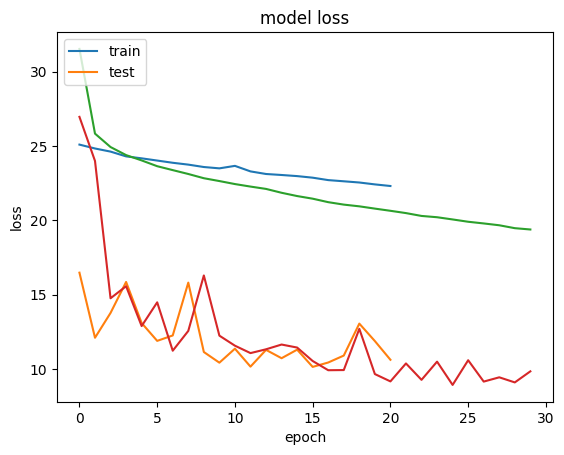

In [27]:
lr_list = [0.001, 0.005, 0.01]
BATCH_SIZE_list = [128, 64, 32]
for lr in lr_list:
    for BATCH_SIZE in BATCH_SIZE_list:
        epoch = 100 # Because there is early stopping
        print("Creating our model...")
        base_model = tf.keras.applications.resnet50.ResNet50(
            include_top=False,
            weights=None,
            input_shape=(IMG_HEIGHT, IMG_WIDTH, 1))
        x = tf.keras.layers.Flatten()(base_model.output)
        x = tf.keras.layers.Dense(256,
                                  activation='relu')(x)
        x = tf.keras.layers.Dropout(0.5)(x)
        output_layer = tf.keras.layers.Dense(48,
                                             activation='linear',
                                             name="DenseOutput")(x)
        model = tf.keras.models.Model(inputs=base_model.input, outputs=output_layer)
        loss_fn = tf.keras.losses.CosineSimilarity(
            axis=-1, reduction="auto", name="cosine_similarity"
        )
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                      loss='mae',
                      metrics=['mae'])
        print("Finished compiling our model")
        print("Initializing Training process...")
        train_gen = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
        val_gen = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
        train_gen = train_gen.batch(BATCH_SIZE).map(lambda x, y: (tf.py_function(load_xy, [x, y], [tf.float32, tf.float32])))
        val_gen = val_gen.batch(BATCH_SIZE).map(lambda x, y: (tf.py_function(load_xy, [x, y], [tf.float32, tf.float32])))
        checkpoint_path = f"Model/resnet_bs{BATCH_SIZE}_lr{lr}.h5"
        model_path = Path(checkpoint_path)
        model_exist = model_path.is_file()
        cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         mode='min',
                                                         monitor='val_loss',
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         verbose=1,
                                                         )
        early_stop_callback = tf.keras.callbacks.EarlyStopping(patience=5)
        if model_exist:
            print("Continue Training with pre-trained weights")
            model.load_weights(checkpoint_path)
        else:
            print(f"Start Training with Batch Size of {BATCH_SIZE}")
        history = model.fit(
            train_gen,
            epochs=epoch,
            verbose=1,
            validation_data=val_gen,
            callbacks=[cp_callback, early_stop_callback]
        )
        print(history.history.keys())
        # summarize history for loss
        plot_name = f'Graph/loss_bs{BATCH_SIZE}_lr{lr}.png'
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.savefig(plot_name)
        plt.show()